In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from scholarly import scholarly 
import urllib.request
from PIL import Image
import os
import csv
import ast

In [ ]:
df = pd.read_csv('Assignment1.csv')

In [ ]:
df['DR-NTU URL']

In [ ]:
# Getting the profile pictures of the professors

os.chdir("dp")

count = 0
for url in df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    src = soup.find(class_ = 'image').find('img')['src']
    src = src.replace(' ', '%20')
    img_src = 'https://dr.ntu.edu.sg' + src
    img = Image.open(requests.get(img_src,stream=True).raw)
    img = img.convert('RGB')
    img.save(str(count)+ '.jpg')
    count+=1

In [ ]:
# Getting the background / biography of the professors

bio = []
for url in df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    c = soup.find(id = 'biographyDiv').text.replace('\n', '')
    bio.append(c)

bio_df = pd.DataFrame(bio, columns = ['Biography'])

In [ ]:
bio_df.to_csv('bio.csv', index = False)

In [ ]:
research_interest = []
profile_pic = []
prof_name = []
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    names = names + ', Nanyang Technological University'
    search_query = scholarly.search_author(names)
    try:
        author = next(search_query)
        if len(author['interests']) == 0:
            research_interest.append(None)
        else:
            research_interest.append(author['interests'])
        profile_pic.append(author['url_picture'])
        prof_name.append(author['name'])
        
    except StopIteration:
        research_interest.append(None)
        profile_pic.append(None)
        prof_name.append(None)

new_df = pd.DataFrame({'Name': prof_name, 'Research Interest': research_interest, 'Profile Picture': profile_pic, })

In [ ]:
test = pd.read_csv('test.csv')
df['Research Interest'] = test['Research Interest']
df

In [ ]:
keywords_df = df[df['Research Interest'].isna()]
keywords_df

In [ ]:
research_interest = []
for url in keywords_df['DR-NTU URL']:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    keyword_list = soup.find_all(class_ = 'rkeyword')
    keywords = []
    for item in keyword_list:
        c = item.text.strip()
        keywords.append(c)
    research_interest.append(keywords)
    

In [ ]:
df['Research Interest'].fillna(research_interest, inplace = True)

In [ ]:
# Getting co-authors from dblp
os.chdir("co_author")


count = 0
for url in df['DBLP URL']:
    names = []
    href = []
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        co_author = soup.find_all(class_ = 'person')
        for item in co_author:
            names.append(item.text)
            href.append(item.find('a')['href'])
        pd.DataFrame(names,href).to_csv(str(count) + '.csv', header = False)
    except:
        print('No dblp page found for ' + str(url))
    count+=1

    

In [ ]:
# trying to get the journals

soup.find(id='coauthor-section').find_all('div')[9::]

In [ ]:
bio = pd.read_csv('bio.csv')


In [ ]:
df = pd.read_csv('Assignment2.csv')
df['Biography'] = bio['Biography']

In [ ]:
df.to_csv('Assignment2.csv', index = False)

In [ ]:
for index,row in df.iterrows():
    image_path = "dp/" + str(index) + ".jpg"
    print(image_path)
Image.open(image_path)

In [ ]:
for index,row in df.iterrows():
    c = row['Research Interest']
    print(c)

In [ ]:
df['Research Interest'] = df['Research Interest'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
df['Research Interest'][0][0]

In [ ]:
from scholarly import scholarly

search_query = scholarly.search_author('AS Madhukumar')
author = next(search_query)
c = scholarly.fill(author,sections = ['basics','counts'])

In [ ]:
savethis = c['cites_per_year']

df = pd.DataFrame(list(savethis.items()), columns=['Year', 'Citations'])
df

In [ ]:
# Searching for prof's names on Google Scholar with NTU tag using Scholarly
test_name = []
test_citation = []
test_affiliation = []

citations = []
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    if names == 'Li Fang':
        continue
    names = names + ', Nanyang Technological University'
    search_query = scholarly.search_author(names)
    try:
        author = next(search_query)
        
        # Test DataFrame to check if the names and affiliation from Scholarly is correct.
        test_name.append(author['name'])
        test_citation.append(author['citedby'])
        test_affiliation.append(author['affiliation'])

        # Append the citations to the list
        citations.append(author['citedby'])
    except StopIteration:
        citations.append(None)
        # print(f"Professor {names} not found")

In [ ]:
df = pd.read_csv('Assignment2.csv')

os.chdir("citations")
for names in df['Full Name']:
    if names == "Ke Yiping, Kelly" :
        names = names.replace("Ke Yiping, Kelly", "Ke Yiping")
    if names == 'Li Fang':
        continue
    try:
        names = names + ', Nanyang Technological University'
        search_query = scholarly.search_author(names)
        author = next(search_query)
        c = scholarly.fill(author,sections = ['basics','counts'])
        savethis = c['cites_per_year']
        df = pd.DataFrame(list(savethis.items()), columns=['Year', 'Citations'])
        df.to_csv(names + '.csv', index = False)
    except:
        print(f"Professor {names} not found")
        
        


In [ ]:
df = pd.read_csv("Assignment2.csv")
# df = df.iloc[0]
df['Research Interest'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
df['Research Interest']

In [ ]:
index = df.loc[df['Full Name'] == 'Bo An'].index[0]

In [ ]:
index

In [ ]:
import networkx as nx

G = nx.Graph()



df = pd.read_csv('co_author/0.csv', header = None)
df

In [ ]:
df1 = pd.read_csv('Assignment2.csv')
for i in range(86):
    if i == 67:
        continue
    df = pd.read_csv('co_author/' + str(i) + '.csv', header = None)
    for index1,row1 in df1.iterrows():
        # print(row1['Full Name'])
        G.add_node(row1['Full Name'])
        for index,row in df.iterrows():
            # print(row[1])
            G.add_node(row[1])
            # print(row1["Full Name"], row[1])
            G.add_edge(row1["Full Name"], row[1])

In [24]:
df = pd.read_csv('Assignment2.csv')
scse_prof_names = df["Full Name"]

In [23]:
df1 = pd.read_csv('co_author/0.csv', header = None)
co_author_names = df1[1]

False

In [29]:
#SCSE Network
import networkx as nx

G = nx.Graph()


df1 = pd.read_csv('Assignment2.csv')
faculty_names = df1['Full Name'].tolist()

for name in faculty_names:
    G.add_node(name)

for i in range(86):
    if i == 67:
        continue
    co_author_df = pd.read_csv('co_author/' + str(i) + '.csv', header = None)
    current_prof = faculty_names[i]

    for _,row in co_author_df.iterrows():
        co_author_name = row[1]
        if co_author_name in faculty_names:
            G.add_edge(current_prof, co_author_name)

/Users/joel/Downloads/Profound/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/Users/joel/Downloads/Profound/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 32705 (\N{CJK UNIFIED IDEOGRAPH-7FC1}) missing from current font.
  func(*args, **kwargs)
/Users/joel/Downloads/Profound/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  func(*args, **kwargs)
/Users/joel/Downloads/Profound/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 26122 (\N{CJK UNIFIED IDEOGRAPH-660A}) missing from current font.
  func(*args, **kwargs)
/Users/joel/Downloads/Profound/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  func(*args, **kw

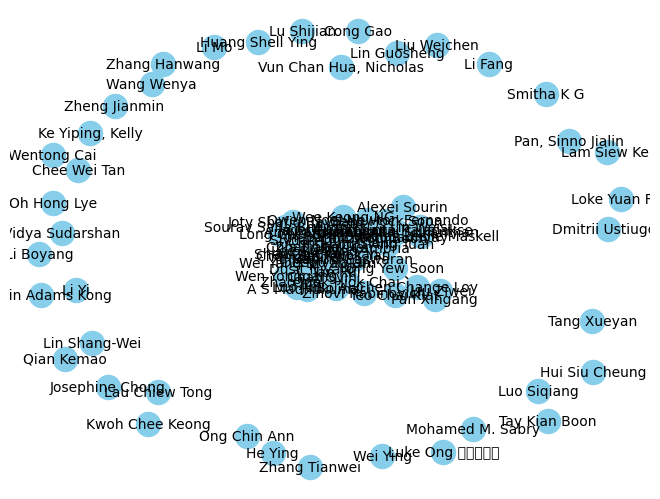

In [30]:
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue', font_size=10)

In [ ]:
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue', font_size=10)

# Display the graph
plt.show()


In [19]:
# column_headers = [
#     "what",
#     "Title",
#     "Acronym",
#     "Source",
#     "Rank",
#     "Note",
#     "DBLP",
#     "Primary FoR",
#     "Comments",
#     "Average Rating"
# ]

# df = pd.read_csv("CORE.csv", names=column_headers,)
# df.drop(columns=["what","Note","DBLP","Primary FoR","Comments","Average Rating"], inplace=True)

In [27]:
df = pd.read_csv("CORE.csv")
df

,Title,Acronym,Source,Rank
0,International Conference on Pervasive Computin...,PERVASIVE,CORE2014,A*
1,International Conference on Information Systems,ICIS,CORE2018,A*
2,ACM Conference on Digital Libraries,JCDL,CORE2018,A*
3,Robotics: Science and Systems,RSS,CORE2018,A*
4,IEEE Information Visualization Conference,IEEE InfoVis,CORE2020,A*
...,...,...,...,...
2219,1st International Conference on Building Energ...,COBEE,ERA2010,NaN
2220,1st International Conference on Engineering Ma...,ICEM,ERA2010,NaN
2221,Globalisation and Landscape Architecture: Issu...,NaN,ERA2010,NaN
2222,Identity and Globalisation: Design for the City,NaN,ERA2010,NaN


In [28]:
df['Rank'].unique()

array(['A*', 'A', 'Australasian', 'Australasian B', 'Australasian C', 'B',
       'C', 'Journal Published', 'Journal published', 'journal published',
       'L', 'Multi-conference', 'Multiconference', 'National',
       'National Russia', 'National: Austria', 'National: bulgaria',
       'National: Bulgaria', 'National: China', 'National: Croatia',
       'National: Czech', 'National: Czecholslovakia', 'National: France',
       'National: Germany', 'National: India', 'National: Iran',
       'National: ireland', 'National: Italy', 'National: Japan',
       'National: japan', 'National: Korea', 'National: korea',
       'National: Malaysia', 'National: Pakistan', 'National: Poland',
       'National: Portugal', 'National: Romania', 'National: romania',
       'National: Russia', 'National: S. Korea', 'National: serbia',
       'National: slovakia', 'National: Spain', 'National: Tunisia',
       'National: UK', 'National: Ukraine', 'National: USA',
       'National: Vietnam', 'National:

,Title,Acronym,Source,Rank
0,International Conference on Pervasive Computin...,PERVASIVE,CORE2014,A*
1,International Conference on Information Systems,ICIS,CORE2018,A*
2,ACM Conference on Digital Libraries,JCDL,CORE2018,A*
3,Robotics: Science and Systems,RSS,CORE2018,A*
4,IEEE Information Visualization Conference,IEEE InfoVis,CORE2020,A*
...,...,...,...,...
2219,1st International Conference on Building Energ...,COBEE,ERA2010,NaN
2220,1st International Conference on Engineering Ma...,ICEM,ERA2010,NaN
2221,Globalisation and Landscape Architecture: Issu...,NaN,ERA2010,NaN
2222,Identity and Globalisation: Design for the City,NaN,ERA2010,NaN


In [30]:
prof = pd.read_csv("publications/Arvind_Easwaran.csv")
prof

,Unnamed: 0,Title,Year,Authors,Journal,Journal Acronym
0,0,Design and analyses of functional mode changes...,2023,"Vijaya Kumar Sundar, Saravanan Ramanathan, Arv...",59: 69-121,rts
1,1,Online Schedule Randomization to Mitigate Timi...,2023,"Ankita Samaddar, Arvind Easwaran",Networks 19: 93:1-93:26,tosn
2,2,PAC-Based Formal Verification for Out-of-Distr...,2023,"Mohit Prashant, Arvind Easwaran",01592,corr
3,3,Co-Design of Out-of-Distribution Detectors for...,2023,"Michael Yuhas, Arvind Easwaran",13419,corr
4,4,Efficient Out-of-Distribution Detection Using ...,2022,"Shreyas Ramakrishna, Zahra RahimiNasab, Gabor ...",6: 15:1-15:34,tcps
...,...,...,...,...,...,...
67,67,DeCoRIC: Decentralized Connected Resilient IoT...,2020,"Nitin Shivaraman, Saravanan Ramanathan, Shanke...",14072,corr
68,68,A Survey on Time-Sensitive Resource Allocation...,2020,"Saravanan Ramanathan, Nitin Shivaraman, Seima ...",14559,corr
69,69,Real-Time Energy Monitoring in IoT-enabled Mob...,2020,"Nitin Shivaraman, Seima Saki, Zhiwei Liu, Sara...",14804,corr
70,70,Resilience Bounds of Network Clock Synchroniza...,2020,"Linshan Jiang, Rui Tan, Arvind Easwaran",15832,corr


In [36]:
prof[prof['Journal Acronym'].isin(df['Acronym'].str.lower())]

,Unnamed: 0,Title,Year,Authors,Journal,Journal Acronym
5,5,Deadline-constrained Multi-resource Task Mappi...,2022,"Chuanchao Gao, Aryaman Shaan, Arvind Easwaran",GLOBECOM 2022: 5037-5043,globecom
9,9,Design Methodology for Deep Out-of-Distributio...,2022,"Michael Yuhas, Daniel Jun Xian Ng, Arvind Easw...",RTCSA 2022: 180-185,rtcsa
10,10,Work-in-Progress: Deadline-Constrained Multi-R...,2022,"Chuanchao Gao, Arvind Easwaran",RTSS 2022: 503-506,rtss
11,11,Behavioural cloning based RL agents for distri...,2022,"Sharath Ram Kumar, Arvind Easwaran, Benoit Del...",BuildSys@SenSys 2022: 466-470,sensys
22,22,Monitoring Cumulative Cost Properties.,2021,"Omar I. Al-Bataineh, Daniel Jun Xian Ng, Arvin...",FormaliSE@ICSE 2021: 19-30,icse
23,23,Cluster-Based Network Time Synchronization for...,2021,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",RTSS 2021: 149-161,rtss
42,42,Real-Time Energy Monitoring in IoT-enabled Mob...,2020,"Nitin Shivaraman, Seima Saki, Zhiwei Liu, Sara...",DATE 2020: 991-994,date
43,43,Efficient Multi-Class Out-of-Distribution Reas...,2020,"Shreyas Ramakrishna, Zahra RahimiNasab, Arvind...",EMSOFT 2020: 40-42,emsoft
44,44,DeCoRIC: Decentralized Connected Resilient IoT...,2020,"Nitin Shivaraman, Saravanan Ramanathan, Shanke...",ICCCN 2020: 1-10,icccn
47,47,Poster Abstract: C-Sync: The Resilient Time Sy...,2020,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",IPSN 2020: 333-334,ipsn


In [60]:
# Assuming df1 and df2 are your DataFrames
import pandas as pd

df=pd.read_csv("CORE.csv")
prof = pd.read_csv("publications/Arvind_Easwaran.csv")

# Convert col2 in df1 and col3 in df2 to lowercase (or uppercase)
df['Acronym'] = df['Acronym'].str.lower()

# Create a boolean mask based on the condition
condition = prof['Journal Acronym'].isin(df['Acronym'])

# Use the boolean mask to filter rows in df1
result_df = prof[condition]
result_df


,Unnamed: 0,Title,Year,Authors,Journal,Journal Acronym
5,5,Deadline-constrained Multi-resource Task Mappi...,2022,"Chuanchao Gao, Aryaman Shaan, Arvind Easwaran",GLOBECOM 2022: 5037-5043,globecom
9,9,Design Methodology for Deep Out-of-Distributio...,2022,"Michael Yuhas, Daniel Jun Xian Ng, Arvind Easw...",RTCSA 2022: 180-185,rtcsa
10,10,Work-in-Progress: Deadline-Constrained Multi-R...,2022,"Chuanchao Gao, Arvind Easwaran",RTSS 2022: 503-506,rtss
11,11,Behavioural cloning based RL agents for distri...,2022,"Sharath Ram Kumar, Arvind Easwaran, Benoit Del...",BuildSys@SenSys 2022: 466-470,sensys
22,22,Monitoring Cumulative Cost Properties.,2021,"Omar I. Al-Bataineh, Daniel Jun Xian Ng, Arvin...",FormaliSE@ICSE 2021: 19-30,icse
23,23,Cluster-Based Network Time Synchronization for...,2021,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",RTSS 2021: 149-161,rtss
42,42,Real-Time Energy Monitoring in IoT-enabled Mob...,2020,"Nitin Shivaraman, Seima Saki, Zhiwei Liu, Sara...",DATE 2020: 991-994,date
43,43,Efficient Multi-Class Out-of-Distribution Reas...,2020,"Shreyas Ramakrishna, Zahra RahimiNasab, Arvind...",EMSOFT 2020: 40-42,emsoft
44,44,DeCoRIC: Decentralized Connected Resilient IoT...,2020,"Nitin Shivaraman, Saravanan Ramanathan, Shanke...",ICCCN 2020: 1-10,icccn
47,47,Poster Abstract: C-Sync: The Resilient Time Sy...,2020,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",IPSN 2020: 333-334,ipsn


In [61]:
ranking_df = df[df['Acronym'].isin(result_df['Journal Acronym'])]
ranking_df

,Title of Conference,Acronym,Source,Rank
6,ACM Conference on Embedded Networked Sensor Sy...,sensys,CORE2023,A*
32,International Conference on Software Engineering,icse,CORE2023,A*
35,Information Processing in Sensor Networks,ipsn,CORE2023,A*
50,Real Time Systems Symposium,rtss,CORE2023,A*
58,IEEE Symposium on Security and Privacy,sp,CORE2023,A*
539,International Conference on Embedded and Real ...,rtcsa,CORE2023,B
824,"Design, Automation and Test in Europe Conference",date,CORE2023,B
855,IEEE Global Telecommunications Conference,globecom,CORE2023,B
863,International Conference on Computer Communica...,icccn,CORE2023,B
2046,ACM Conference on Embedded Software,emsoft,CORE2023,Journal published


In [62]:
merged_df = pd.merge(result_df, ranking_df, left_on='Journal Acronym',right_on="Acronym" ,how='inner')
merged_df

,Unnamed: 0,Title,Year,Authors,Journal,Journal Acronym,Title of Conference,Acronym,Source,Rank
0,5,Deadline-constrained Multi-resource Task Mappi...,2022,"Chuanchao Gao, Aryaman Shaan, Arvind Easwaran",GLOBECOM 2022: 5037-5043,globecom,IEEE Global Telecommunications Conference,globecom,CORE2023,B
1,9,Design Methodology for Deep Out-of-Distributio...,2022,"Michael Yuhas, Daniel Jun Xian Ng, Arvind Easw...",RTCSA 2022: 180-185,rtcsa,International Conference on Embedded and Real ...,rtcsa,CORE2023,B
2,10,Work-in-Progress: Deadline-Constrained Multi-R...,2022,"Chuanchao Gao, Arvind Easwaran",RTSS 2022: 503-506,rtss,Real Time Systems Symposium,rtss,CORE2023,A*
3,23,Cluster-Based Network Time Synchronization for...,2021,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",RTSS 2021: 149-161,rtss,Real Time Systems Symposium,rtss,CORE2023,A*
4,11,Behavioural cloning based RL agents for distri...,2022,"Sharath Ram Kumar, Arvind Easwaran, Benoit Del...",BuildSys@SenSys 2022: 466-470,sensys,ACM Conference on Embedded Networked Sensor Sy...,sensys,CORE2023,A*
5,22,Monitoring Cumulative Cost Properties.,2021,"Omar I. Al-Bataineh, Daniel Jun Xian Ng, Arvin...",FormaliSE@ICSE 2021: 19-30,icse,International Conference on Software Engineering,icse,CORE2023,A*
6,42,Real-Time Energy Monitoring in IoT-enabled Mob...,2020,"Nitin Shivaraman, Seima Saki, Zhiwei Liu, Sara...",DATE 2020: 991-994,date,"Design, Automation and Test in Europe Conference",date,CORE2023,B
7,43,Efficient Multi-Class Out-of-Distribution Reas...,2020,"Shreyas Ramakrishna, Zahra RahimiNasab, Arvind...",EMSOFT 2020: 40-42,emsoft,ACM Conference on Embedded Software,emsoft,CORE2023,Journal published
8,44,DeCoRIC: Decentralized Connected Resilient IoT...,2020,"Nitin Shivaraman, Saravanan Ramanathan, Shanke...",ICCCN 2020: 1-10,icccn,International Conference on Computer Communica...,icccn,CORE2023,B
9,47,Poster Abstract: C-Sync: The Resilient Time Sy...,2020,"Nitin Shivaraman, Patrick Schuster, Saravanan ...",IPSN 2020: 333-334,ipsn,Information Processing in Sensor Networks,ipsn,CORE2023,A*
